__собираем статистики по объявлениям о продаже квартир__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Пн 12 авг 2024 11:38:55 MSK


# загружаем данные

In [2]:
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_flat.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

55156

title  \
30334   3-к. квартира, 75,6 м², 1/9 эт.   
40794  1-к. апартаменты, 32 м², 1/3 эт.   
53317     1-к. квартира, 23 м², 3/5 эт.   

                                                        address  latitude  \
30334  севастополь,жк «доброгород» улица токарева,8 этап,блок 2     44.58   
40794                          севастополь,качинское шоссе ,33а     44.67   
53317                     севастополь,улица маршала геловани,20     44.57   

       longitude  priceM          dt  
30334      33.51   11.19  2024-06-17  
40794      33.57    3.50  2024-07-30  
53317      33.53    6.20  2024-06-10

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55156 entries, 0 to 55846
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   url            55156 non-null  object        
 1   place          55156 non-null  object        
 2   title          55156 non-null  object        
 3   subtitle       21140 non-null  object        
 4   price          55156 non-null  int64         
 5   address        55156 non-null  object        
 6   description    55156 non-null  object        
 7   ts             55156 non-null  datetime64[us]
 8   nrooms         55156 non-null  int64         
 9   floor          55156 non-null  int64         
 10  nfloors        55156 non-null  int64         
 11  area           55156 non-null  float64       
 12  is_studio      55156 non-null  bool          
 13  is_apartment   55156 non-null  bool          
 14  is_part        55156 non-null  bool          
 15  is_auction     55156 non

In [5]:
# cols = ['title','address','latitude','longitude','priceM','dt','place','url']
# df[ (df['place']=='sevastopol') & (df['address'].str.match(r'.*Судак.*')) ][cols]

---

In [6]:
# df[ df['ts'].dt.date > pd.to_datetime('2024-01-01').date() ]

In [7]:
# df_ = pd.read_pickle('data/2023/data_flat.pkl').rename(columns={'adr':'address'})
# display( len(df_) )
# df_ = (
#         df_
#         .dropna(subset=['dt','url'])
#         .drop_duplicates(['dt','url'])
#         .drop(columns=['adr_orig','obj_name','avito_page','cian_page'])
#     )
# display( len(df_) )
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# display( df_.sample(3)[cols] )

In [8]:
# def address_filter(df):
#     #           46.319437, 33.911048
#     #
#     # 45.402617, 32.455625 |  45.545301, 36.684702
#     #
#     #          44.320887, 33.917013

#     df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
#     df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

#     df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 

#     df.loc[ df['url']=='https://avito.ru/2322251740', ['latitude','longitude']] = None

#     df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
#     df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

#     df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
#     df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

#     df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
#     df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
#     df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
#     df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
#     df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

#     df.loc[ df['address'].str.lower().str.match(r'.*ялта.*') , 'place' ] = 'yalta'
#     df.loc[ df['address'].str.lower().str.match(r'.*феодосия.*') , 'place' ] = 'feodosia'
#     df.loc[ df['address'].str.lower().str.match(r'.*окуневка.*') , 'place' ] = 'tarkhankut'
#     df.loc[ df['address'].str.lower().str.match(r'.*заветное.*') , 'place' ] = 'kerch'
#     df.loc[ df['address'].str.lower().str.match(r'.*евпатория.*') , 'place' ] = 'evpatoria'
#     df.loc[ df['address'].str.lower().str.match(r'.*симферопольский район.*'), 'place' ] = 'simferopol'

#     df = df.dropna(subset=['latitude','longitude'])
    
#     return df

In [9]:
# df_ = address_filter(df_)
# history_date = df_['dt'].max()
# df = pd.concat([df,df_])
# display( len(df) )
# del df_

----

In [10]:
df['month'] = df['ts'].dt.to_period('M')
df['week'] = df['ts'].dt.to_period('W')

In [11]:
display( len(df) )
df = df.dropna(subset=['latitude','longitude'])
display( len(df) )

55156

55156

----

In [12]:
display(len(df))
# выкидываем "ущербные" варианты 
df = df.query('~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)&(nrooms>0)&(nrooms<4)')
display(len(df))
df = df.query('priceM>1.') # выкидываем предожения с аномально низкой ценой
display(len(df))

55156

26168

26168

In [13]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

title  \
33811    2-к. квартира, 56 м², 3/8 эт.   
37827  2-к. квартира, 57,3 м², 2/9 эт.   
40647    1-к. квартира, 29 м², 1/8 эт.   

                                       address  latitude  longitude  priceM  \
33811           севастополь,улица токарева,18б     44.58      33.51    9.25   
37827  севастополь,улица павла корчагина,19бк2     44.59      33.43   11.50   
40647           севастополь,улица токарева,18б     44.58      33.51    6.15   

               dt  
33811  2024-07-16  
37827  2024-08-06  
40647  2024-07-30

---

In [14]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
# display( dt_min,history_date,dt_max )
print( dt_min,' : ',dt_max )

2024-06-07  :  2024-08-12


In [15]:
# gdf_history = gdf.query(f'dt <= @history_date')
# gdf = gdf.query(f'dt > @history_date')

In [16]:
# display( len(gdf_history) )
display( len(gdf) )

26168

In [17]:
display( len(gdf) )
gdf = (
    gdf
    .query("place in ('sevastopol','sudak')")
    # .drop_duplicates(['dt','url'])
    .drop_duplicates(['url','week'])
    .reset_index(drop=True)
)
display( len(gdf) )

26168

19495

In [18]:
# # display( gdf.columns )

# display( len(gdf) )
# gdf = gdf.drop_duplicates(['url','week'])
# display( len(gdf) )

In [19]:
# gdf.columns

In [20]:
# цена за квадратный метр (тыс.руб.)
gdf['price_area_K'] = (gdf['price']/gdf['area'])/1_000

# общая статистика

In [21]:
gdf[['title','address','priceM','geometry']].sample(1024).explore()

In [22]:
gdf.query('place=="sevastopol"')[['title','address','priceM','geometry']].sample(1024).explore()

In [23]:
gdf.query('place=="sudak"')[['title','address','priceM','geometry']].explore()

In [24]:
# gdf_last[ gdf_last['address'].str.match(r'.*долина роз.*') ][['title','address','priceM','geometry','url']].explore()

---

In [25]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = (
        gdf
        .groupby(['place','nrooms','week'])
#         .groupby(['place','nrooms','month'])
        ['priceM'].describe(percentiles=percentiles)
    )
    
display( stat )

count  mean  std  min   1%   5%  10%  \
place      nrooms week                                                          
sevastopol 1      2024-06-03/2024-06-09 660.00  7.01 2.01 2.70 3.66 4.50 4.80   
                  2024-06-10/2024-06-16 960.00  7.11 1.96 2.70 3.88 4.50 4.90   
                  2024-06-17/2024-06-23 846.00  7.11 1.88 2.70 3.70 4.60 4.90   
                  2024-06-24/2024-06-30 664.00  7.15 1.88 2.70 3.66 4.56 4.92   
                  2024-07-08/2024-07-14 700.00  7.34 2.36 2.80 3.55 4.50 4.85   
                  2024-07-15/2024-07-21 345.00  6.93 2.03 2.50 3.66 4.50 4.87   
                  2024-07-22/2024-07-28 695.00  7.28 2.29 2.70 3.79 4.50 4.90   
                  2024-07-29/2024-08-04 694.00  7.21 2.23 1.80 3.53 4.50 4.93   
                  2024-08-05/2024-08-11 680.00  7.44 4.16 1.80 3.53 4.50 4.90   
                  2024-08-12/2024-08-18 675.00  7.51 2.53 2.70 3.66 4.69 5.00   
           2      2024-06-03/2024-06-09 651.00  9.21 3.15 3.50 4.43 5.65 6.00   
                  2024-06-10/2024-06-16 863.00  9.28 3.10 3.50 4.43 5.71 6.10   
                  2024-06-17/2024-06-23 821.00  9.36 3.32 3.50 4.41 5.80 6.10   
                  2024-06-24/2024-06-30 648.00  9.36 3.33 3.35 4.32 5.85 6.18   
                  2024-07-08/2024-07-14 665.00  9.43 3.65 2.60 4.28 5.61 6.10   
                  2024-07-15/2024-07-21 256.00  8.75 3.39 3.35 4.10 5.55 5.85   
                  2024-07-22/2024-07-28 652.00  9.49 3.67 3.35 4.50 5.63 6.10   
                  2024-07-29/2024-08-04 666.00  9.51 3.55 3.35 4.43 5.60 6.20   
                  2024-08-05/2024-08-11 625.00  9.54 3.71 3.35 4.30 5.50 6.14   
                  2024-08-12/2024-08-18 677.00  9.56 3.65 3.35 4.29 5.50 6.10   
           3      2024-06-03/2024-06-09 347.00 11.61 4.75 4.30 5.25 6.81 7.33   
                  2024-06-10/2024-06-16 510.00 11.80 5.79 4.20 5.11 6.94 7.50   
                  2024-06-17/2024-06-23 469.00 11.61 5.70 4.20 5.27 7.10 7.50   
                  2024-06-24/2024-06-30 373.00 11.76 6.08 4.20 5.68 7.00 7.50   
                  2024-07-08/2024-07-14 362.00 11.95 6.25 5.00 5.26 6.95 7.50   
                  2024-07-15/2024-07-21 150.00 10.99 4.13 4.20 5.70 7.00 7.30   
                  2024-07-22/2024-07-28 397.00 11.60 6.18 4.20 5.30 6.50 7.10   
                  2024-07-29/2024-08-04 385.00 11.98 6.36 3.90 5.28 6.50 7.37   
                  2024-08-05/2024-08-11 369.00 11.90 6.35 3.90 5.27 6.50 7.34   
                  2024-08-12/2024-08-18 415.00 11.80 4.95 4.00 5.50 6.50 7.47   
sudak      1      2024-06-03/2024-06-09 121.00  8.73 2.46 3.30 3.54 5.14 5.59   
                  2024-06-10/2024-06-16 134.00  8.87 2.45 3.30 3.63 5.06 5.59   
                  2024-06-17/2024-06-23 128.00  8.96 2.45 3.30 4.16 5.14 5.59   
                  2024-06-24/2024-06-30 113.00  8.87 2.49 3.30 4.36 5.17 5.59   
                  2024-07-08/2024-07-14 115.00  9.19 2.58 3.30 4.44 5.23 5.77   
                  2024-07-15/2024-07-21 113.00  9.11 2.73 3.30 4.44 5.21 5.77   
                  2024-07-22/2024-07-28 105.00  9.12 2.81 3.40 4.34 4.97 5.56   
                  2024-07-29/2024-08-04 101.00  9.57 2.69 3.30 4.44 5.30 5.85   
                  2024-08-05/2024-08-11  78.00 10.60 2.52 3.30 4.18 5.22 6.79   
                  2024-08-12/2024-08-18  84.00  9.83 2.75 3.30 4.25 5.53 5.96   
           2      2024-06-03/2024-06-09  83.00 12.36 5.42 3.70 3.86 4.50 5.31   
                  2024-06-10/2024-06-16  87.00 12.29 5.42 3.70 3.87 4.50 5.47   
                  2024-06-17/2024-06-23  90.00 12.21 5.29 3.70 3.88 4.54 5.61   
                  2024-06-24/2024-06-30  80.00 12.46 5.48 3.70 3.86 4.50 5.61   
                  2024-07-08/2024-07-14  87.00 12.09 5.63 3.70 3.87 4.50 5.38   
                  2024-07-15/2024-07-21  89.00 12.16 5.46 3.70 3.88 4.50 5.44   
                  2024-07-22/2024-07-28  85.00 12.02 5.65 3.60 3.68 4.26 5.32   
                  2024-07-29/2024-08-04  81.00 12.56 5.45 3.00 3.48 4.50

In [26]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
sizes = stat.reset_index()['nrooms'].unique()

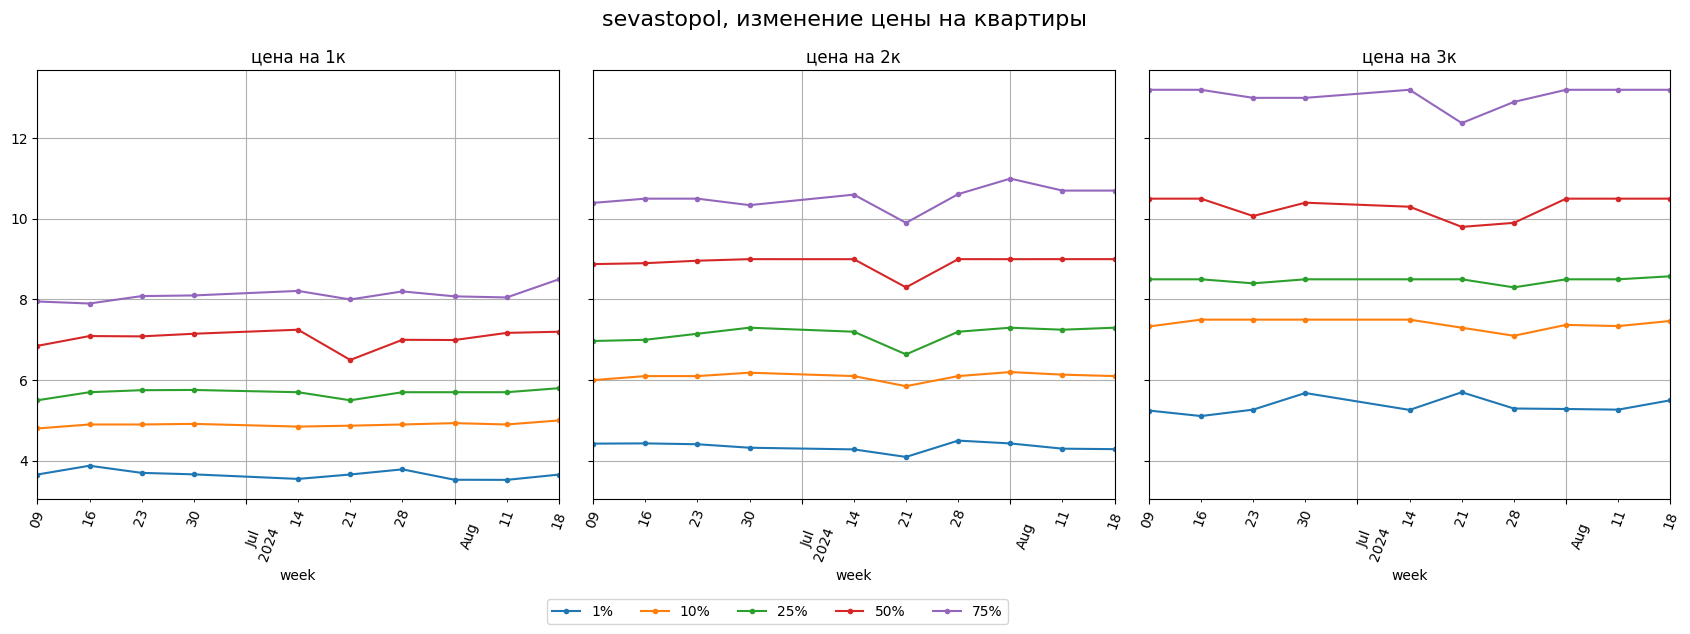

In [27]:
# history_date

place = 'sevastopol'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена на {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

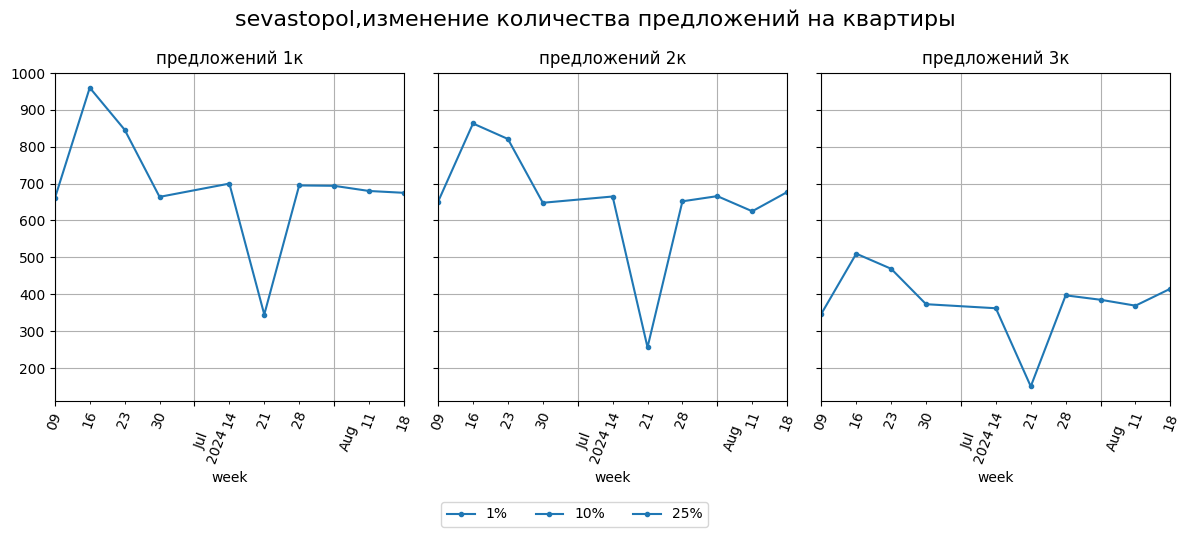

In [28]:
fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place},изменение количества предложений на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

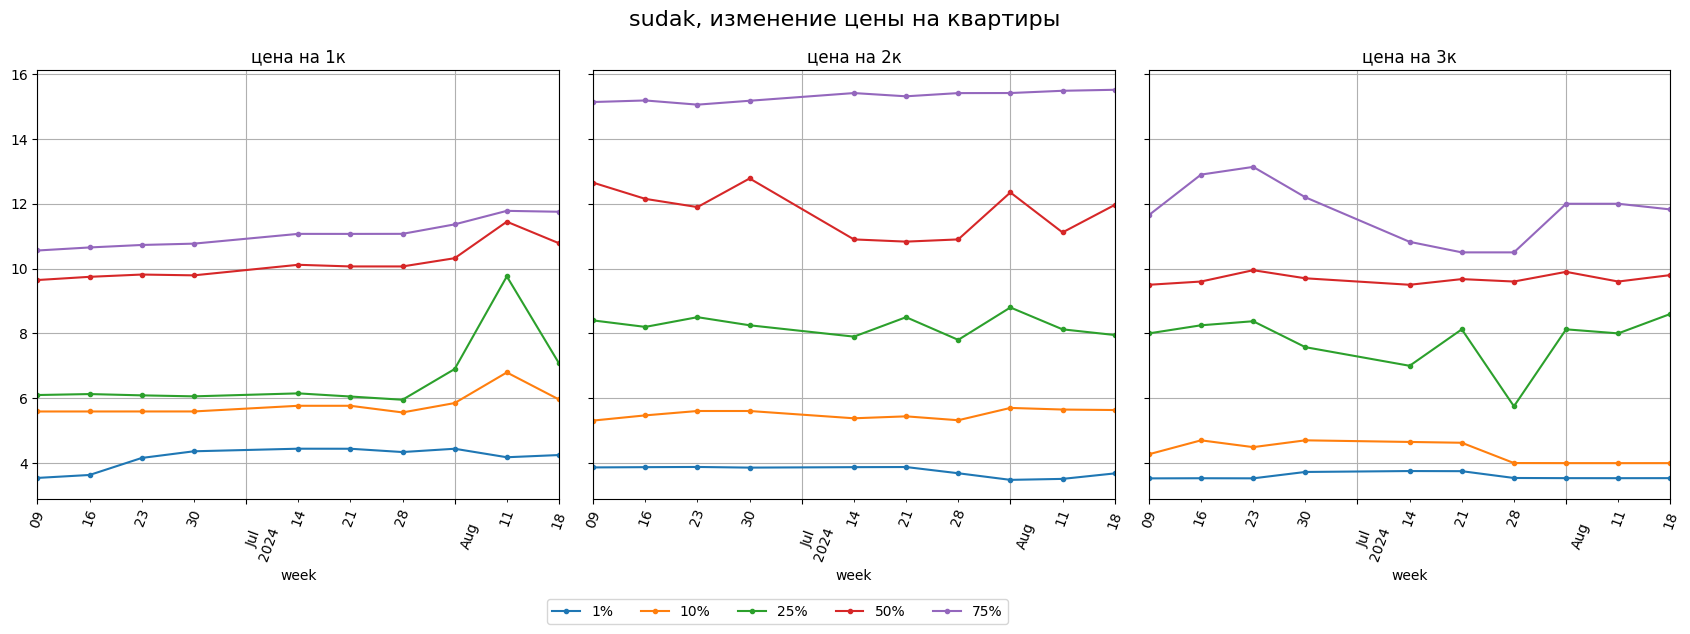

In [29]:
# history_date

place = 'sudak'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена на {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

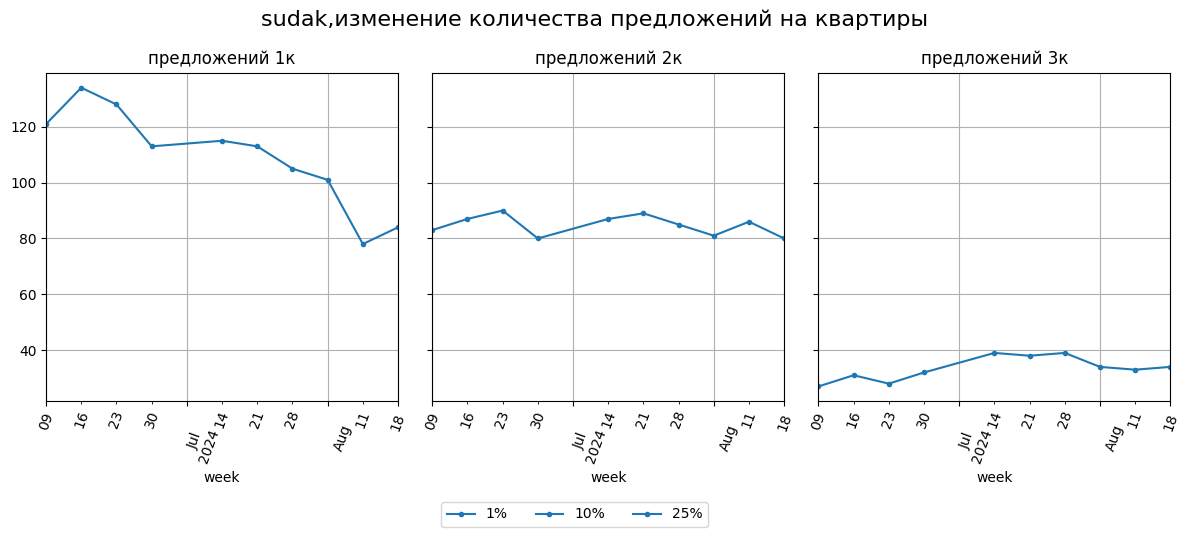

In [30]:
fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place},изменение количества предложений на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

# актуальная цена

In [31]:
# sorted(gdf['dt'].unique() )

In [32]:
# dt_now = pd.to_datetime('2024-06-17').date()
dt_now = gdf['dt'].max()
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == dt_now ]
display(len(gdf_last))

19495

1965

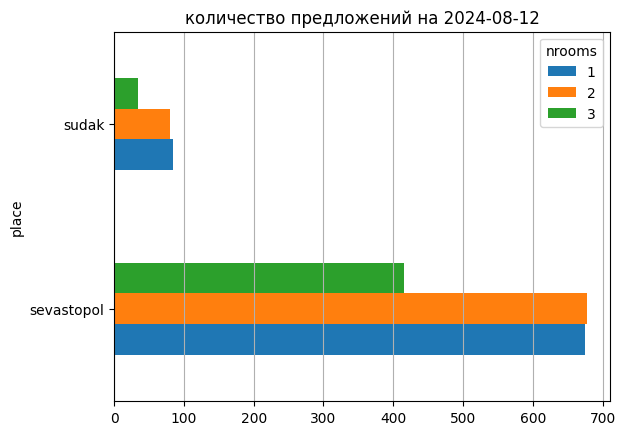

In [33]:
(
gdf_last
.drop_duplicates('url')
.groupby(['nrooms','place'])['url'].count().reset_index()
.pivot(index='place', columns='nrooms', values='url')
.plot.barh(title='количество предложений на '+ str(dt_now))
.grid(axis='x')    
)

In [34]:
(
    gdf_last
    .drop_duplicates('url')
    .groupby(['place','nrooms'])
    ['priceM'].describe(percentiles=percentiles)
)

count  mean  std  min   1%   5%  10%  25%   50%   75%  \
place      nrooms                                                          
sevastopol 1      675.00  7.51 2.53 2.70 3.66 4.69 5.00 5.80  7.20  8.50   
           2      677.00  9.56 3.65 3.35 4.29 5.50 6.10 7.30  9.00 10.70   
           3      415.00 11.80 4.95 4.00 5.50 6.50 7.47 8.57 10.50 13.20   
sudak      1       84.00  9.83 2.75 3.30 4.25 5.53 5.96 7.08 10.78 11.75   
           2       80.00 12.38 5.72 3.60 3.68 4.49 5.64 7.95 11.96 15.52   
           3       34.00 10.51 5.61 3.50 3.53 3.67 4.00 8.60  9.80 11.82   

                    90%   95%   max  
place      nrooms                    
sevastopol 1      10.00 13.39 19.71  
           2      13.50 15.80 41.00  
           3      18.24 22.00 47.00  
sudak      1      12.37 12.46 16.92  
           2      21.08 23.52 25.30  
           3      15.35 22.44 30.00

In [35]:
q_95 = gdf_last.groupby(['place'])['priceM'].quantile(.95)

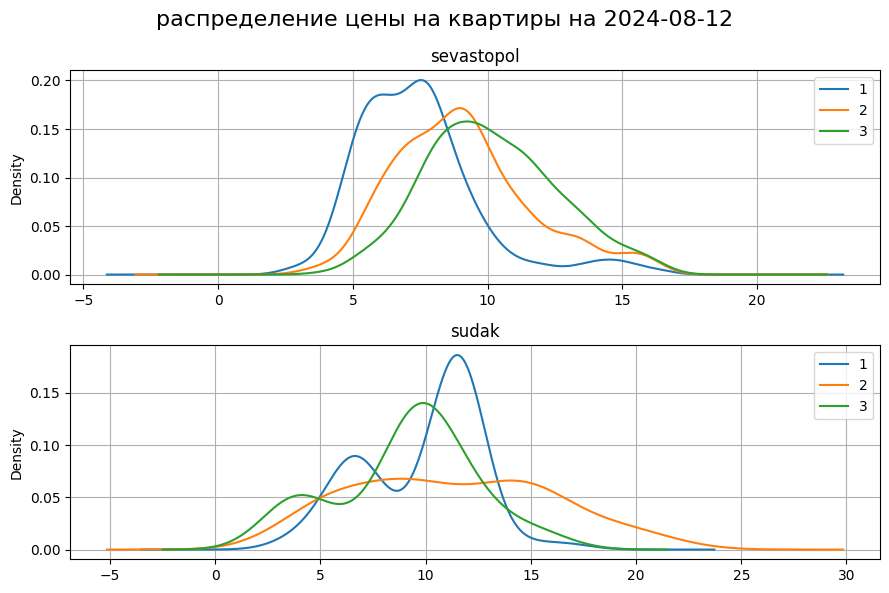

In [36]:
places = ['sevastopol','sudak',]
fig, ax = plt.subplots(len(places),1,figsize=(9,6) )
for i,p in enumerate(places): 
    (
        gdf_last
        .drop_duplicates('url')
        .query(f'(place=="{p}")&(priceM<{q_95[p]})')
        .groupby(['nrooms'],observed=True)
        ['priceM'].plot.kde(legend=True,ax=ax[i],title=f'{p}', grid=True)   
    )
fig.suptitle(f'распределение цены на квартиры на '+ str( gdf_last['dt'].max() ), fontsize=16)
fig.tight_layout()

# цены на карте

In [37]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [38]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

## Севастополь

In [39]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

# frame_sevastopol.explore()

In [40]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=7 )

In [41]:
gdf_last.columns #[['']]

Index(['url', 'place', 'title', 'subtitle', 'price', 'address', 'description',
       'ts', 'nrooms', 'floor', 'nfloors', 'area', 'is_studio', 'is_apartment',
       'is_part', 'is_auction', 'is_openspace', 'is_roof', 'is_SNT', 'priceM',
       'is_last_floor', 'address_orig', 'place_', 'latitude', 'longitude',
       'dt', 'month', 'week', 'geometry', 'price_area_K'],
      dtype='object')

In [42]:
# медиана цены за квадратный метр (тыс.руб.)

grid_values = ( 
    grid
    .sjoin( gdf_last.drop_duplicates('url').query('place=="sevastopol"'), how='inner',)
    .groupby(['hex_id'])
    ['price_area_K']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('price_area_K',cmap='rainbow') #'area_name', legend=True)

## Судак

In [43]:
frame_sudak = gpd.GeoDataFrame([{ # все предложения
            'place':'sudak', 
            'geometry':MultiPoint( gdf_last.query('place=="sudak"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

# frame_sudak.explore()

In [44]:
grid = cover_grid_hexagonal( frame_sudak.geometry.values[0],cell_size=9 )

In [45]:
# медиана цены за квадратный метр (тыс.руб.)
grid_values = ( 
    grid
    .sjoin( 
        gdf_last
        .drop_duplicates('url')
        .query('place=="sudak"'), how='inner',)
    .groupby(['hex_id'])
    ['price_area_K']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('price_area_K',cmap='rainbow') #'area_name', legend=True)

# районы Севастополя

In [46]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

# display(frames)

In [47]:
display(frames[['area_name']])

area_name
0     Севастополь, район Острякова
1  Севастополь, парк 60-летия СССР
2  Севастополь, Хрусталёва/Хрюкина
3  Севастополь, Геловани/Коломийца
4     Севастополь, Музыки/Бирюзова
5   Севастополь, кр.горка (старый)
6    Севастополь, кр.горка (новый)
7      Севастополь, Малахов курган
8       Севастополь, Благополучный

In [48]:
frames.explore('area_name', legend=True)

In [49]:
area_name=[
# 'Севастополь, парк 60-летия СССР',
#'Севастополь, Хрусталёва/Хрюкина',
'Севастополь, район Острякова',
#'Севастополь, Малахов курган',
# 'Севастополь, Геловани/Коломийца',
]

In [50]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

In [51]:
# фильтруем данные по области
gdf_last_local = gdf_last.drop_duplicates('url').sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceM','address','geometry']].explore( legend=False)

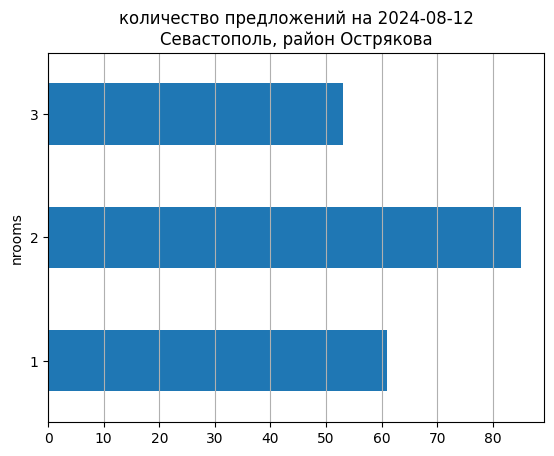

In [52]:
(
    gdf_last_local
    .drop_duplicates('url')
    .groupby(['nrooms'])['url'].count()
    .plot.barh(title='количество предложений на '+ str( dt_now ) + '\n' + ' / '.join(area_name) )
    .grid(axis='x')   
)

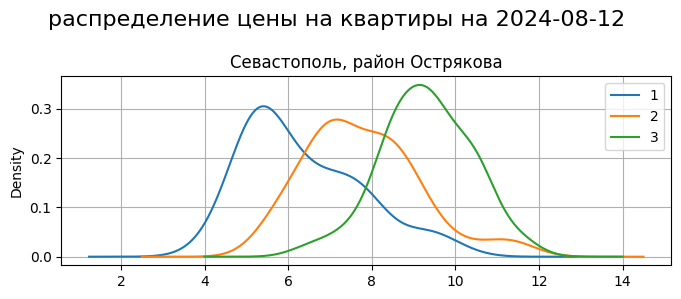

In [53]:
q_95 = gdf_last_local['priceM'].quantile(.95)

fig, ax = plt.subplots(figsize=(7,3) )
(
    gdf_last_local
    .query(f'(priceM<{q_95})')
    .drop_duplicates('url')
    .groupby(['nrooms'],observed=True)
    ['priceM'].plot.kde(legend=True,ax=ax,title='/'.join(area_name), grid=True)   
)
fig.suptitle(f'распределение цены на квартиры на '+ str( dt_now ), fontsize=16)
fig.tight_layout()

----

In [54]:
# изменение цены по району
gdf_local = gdf.sjoin( frame_, how='inner', predicate='within') 

In [55]:
percentiles=[.01,.05,.1,.25,.5,.75,.9]
# stat = gdf_local.groupby(['nrooms','month'],observed=True)['priceM'].describe(percentiles=percentiles)
stat = gdf_local.groupby(['nrooms','week'],observed=True)['priceM'].describe(percentiles=percentiles)
# display( stat )

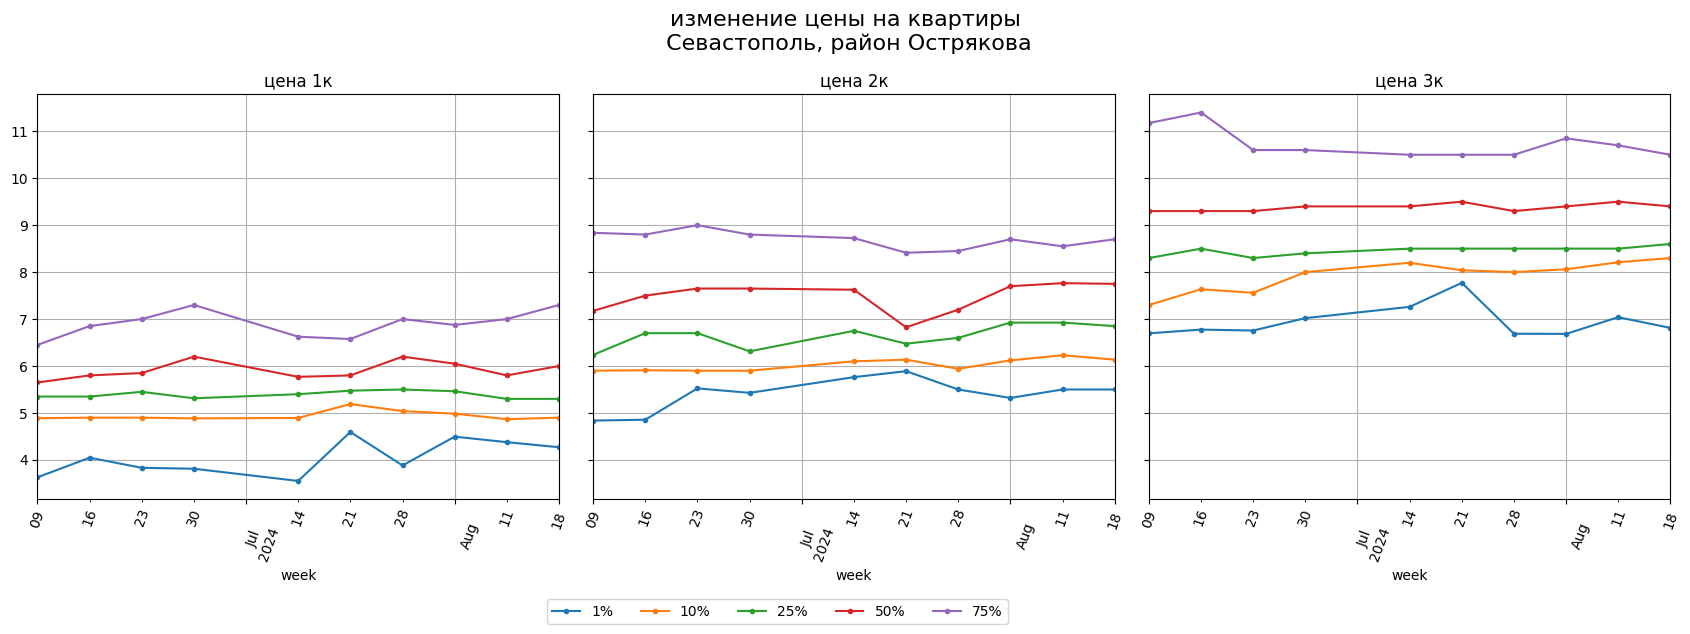

In [56]:
fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(s),cols].plot(title=f'цена {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение цены на квартиры\n {'/'.join(area_name)}', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

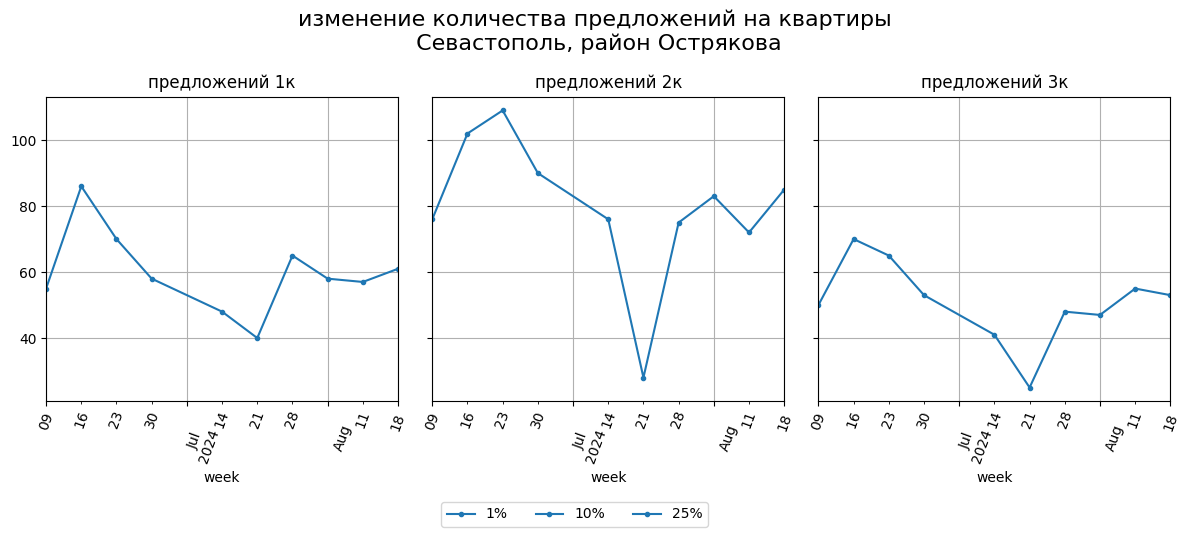

In [57]:
fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение количества предложений на квартиры\n {'/'.join(area_name)}', fontsize=16)

fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()